In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))


(265703, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


In [5]:
# check distinct groups
print(FixData['Group'].unique())

[ 4.  1.  3.  2. nan]


In [6]:
# Remove Group = NaN
FixData=FixData[~FixData['Group'].isna()]

In [7]:
print(FixData['Group'].unique())

[4. 1. 3. 2.]


dataset size:  (249558, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 193 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  193 observers and  36  stimuli.


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  36.84  +/-  9.78
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  6790
Mean X location:  477.7  +/-  92.1  pixels
Mean Y location:  465.8  +/-  65.7  pixels
Mean saccade  amplitude:  79.4  +/-  18.3  pixels
Mean scanpath  length:  2472.1  +/-  559.2  pixels
Data for  193 observers and  36  stimuli.
Mean fixation number:  36.84  +/-  9.78
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  6790
Mean X location:  477.7  +/-  92.1  pixels
Mean Y location:  465.8  +/-  65.7  pixels
Mean saccade  amplitude:  79.4  +/-  18.3  pixels
Mean scanpath  length:  2472.1  +/-  559.2  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21927', '21930', '21939',
        '21946', '22018', '22036', '22108', '22109', '22127', '22129',
        '22138', '22149', '22168', '22174', '22180', '22181', '22186',
        '22204', '22214', '22219', '22228', '22234', '22239', '22242',
        '22261', '22271', '22279', '22291', '22322', '22324', '22327',
        '22341', '22346', '22376', '22378', '22383', '22388', '22394',
        '22410', '22411', '

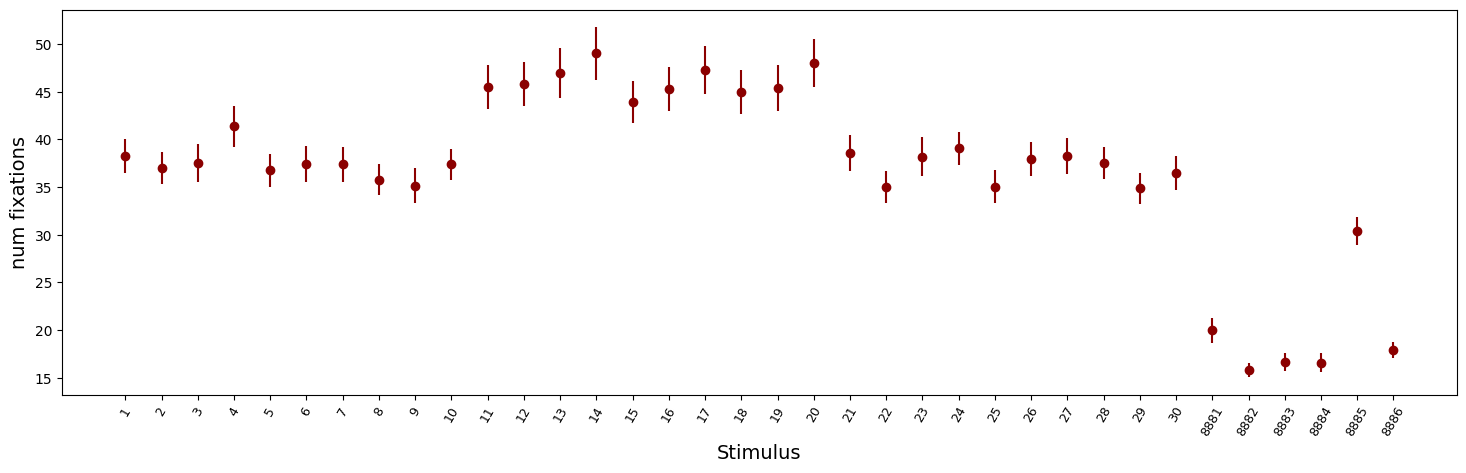

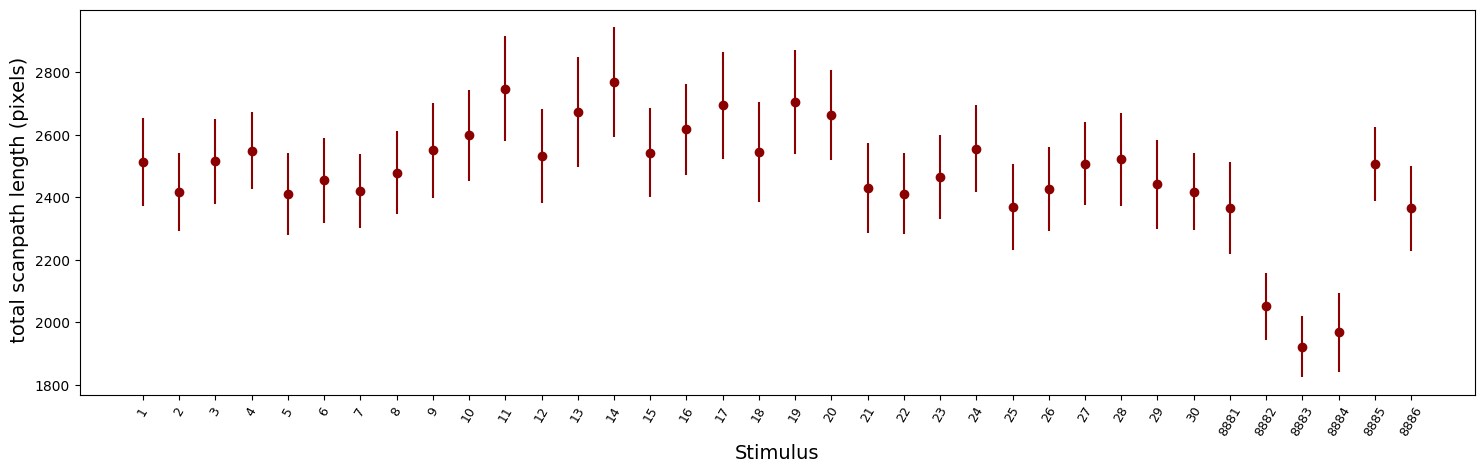

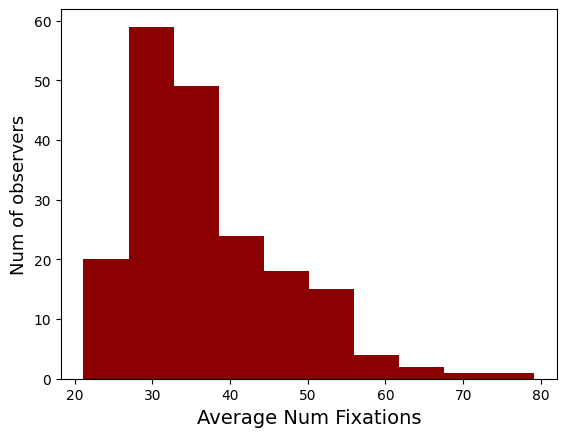

In [8]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [9]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
map_stim_subj = {}
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[117:,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[117+x] = +1
            map_stim_subj[i] = map_stim_subj.get(i, []) + [DyslexiaDat.subjects[117+x]]
            set_subj.add(117+x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

4 Stimuli with complete data: [7, 8, 32, 33]
32 Stimuli with Missing data: {0: 1, 1: 3, 2: 2, 3: 1, 4: 4, 5: 3, 6: 4, 9: 6, 10: 6, 11: 6, 12: 2, 13: 2, 14: 4, 15: 4, 16: 5, 17: 3, 18: 3, 19: 4, 20: 4, 21: 2, 22: 6, 23: 3, 24: 4, 25: 3, 26: 2, 27: 5, 28: 4, 29: 2, 30: 5, 31: 5, 34: 8, 35: 5}
Max subject that have not seen the stimulus: 8
52 Subjects with missing data: {173: 1, 124: 1, 156: 1, 177: 1, 157: 1, 118: 1, 169: 1, 192: 1, 154: 1, 163: 1, 190: 1, 139: 1, 143: 1, 178: 1, 117: 1, 121: 1, 133: 1, 144: 1, 127: 1, 136: 1, 149: 1, 162: 1, 185: 1, 167: 1, 146: 1, 150: 1, 165: 1, 191: 1, 151: 1, 159: 1, 175: 1, 180: 1, 125: 1, 122: 1, 148: 1, 172: 1, 130: 1, 135: 1, 158: 1, 182: 1, 131: 1, 160: 1, 138: 1, 161: 1, 189: 1, 119: 1, 120: 1, 123: 1, 134: 1, 142: 1, 155: 1, 174: 1}


In [10]:
s = 0
for i in range(0,10):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the first 10 stimuli')

s = 0
for i in range(11,20):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 11 to 20 stimuli')

s = 0
for i in range(21,30):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 21 to 30 stimuli')

24 Subjects with missing data for the first 10 stimuli
33 Subjects with missing data for the stimuli from 11 to 20 stimuli
31 Subjects with missing data for the stimuli from 21 to 30 stimuli


Here we check for the Graz subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Compared to the Munich data here it seems to be not possible to remove, either the stimuli with subject that have not seen them or the subjects that have not seen a specific stimulus.

The solution is to exclude dynamically the subjects that have not seen a specific stimulus.

---

In [26]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [1. 2. 3. 4.]


In [27]:
WhichC = np.array(WhichC, dtype=float)
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [28]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [14]:
x = DyslexiaDat.subjects
GrazSubs_Idx = [i for i, subj in enumerate(x) if 'P' in subj]
MunichSubs_Idx = [i for i, subj in enumerate(x) if 'P' not in subj]

---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

We start from the Similarity features of a single stimulus

In [15]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [16]:
list(set_subj)

[130,
 131,
 133,
 134,
 135,
 136,
 138,
 139,
 142,
 143,
 144,
 146,
 148,
 149,
 150,
 151,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 165,
 167,
 169,
 172,
 173,
 174,
 175,
 177,
 178,
 180,
 182,
 185,
 189,
 190,
 191,
 192,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 127]

In [17]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [18]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [19]:
stimuli = list(range(0, 30))

In [20]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\Utente\AppData\Local\Temp\ipykernel_58512\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered i

Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [21]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [22]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', match=True, Thr=0)

In [23]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [24]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [29]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(GrazSubs_Idx))

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(100):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(MunichSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [30]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 74 train subjects so 74 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

100
30
71
8


In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [33]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
    def forward(self, x): 
        return x

In [34]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(100):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)

        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

In [35]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, subj_id in enumerate(subj):
        vector_roi[s][0] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][1] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][2] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [36]:
import re


torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(60, 30)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 15) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(15, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6574465036392212
Epoch 5 loss: 0.5080522894859314
Epoch 10 loss: 0.403476744890213
Epoch 15 loss: 0.3514283001422882
Epoch 0 loss: 0.660060703754425
Epoch 5 loss: 0.40199920535087585
Epoch 10 loss: 0.3669017255306244
Epoch 15 loss: 0.3410501182079315
Epoch 0 loss: 0.6880471706390381
Epoch 5 loss: 0.47968170046806335
Epoch 10 loss: 0.41330552101135254
Epoch 15 loss: 0.3615858852863312
Epoch 0 loss: 0.6831998229026794
Epoch 5 loss: 0.4840914309024811
Epoch 10 loss: 0.3745713233947754
Epoch 15 loss: 0.35048219561576843
Epoch 0 loss: 0.7482529282569885
Epoch 5 loss: 0.5427104234695435
Epoch 10 loss: 0.40269044041633606
Epoch 15 loss: 0.3582208752632141
Epoch 0 loss: 0.6095530390739441
Epoch 5 loss: 0.4448191225528717
Epoch 10 loss: 0.4032343327999115
Epoch 15 loss: 0.36685627698898315
Epoch 0 loss: 0.7238066792488098
Epoch 5 loss: 0.4828515946865082
Epoch 10 loss: 0.3763431906700134
Epoch 15 loss: 0.3419610857963562
Epoch 0 loss: 0.8185997009277344
Epoch 

Approximation Error: 7.550321606686339e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_58512\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


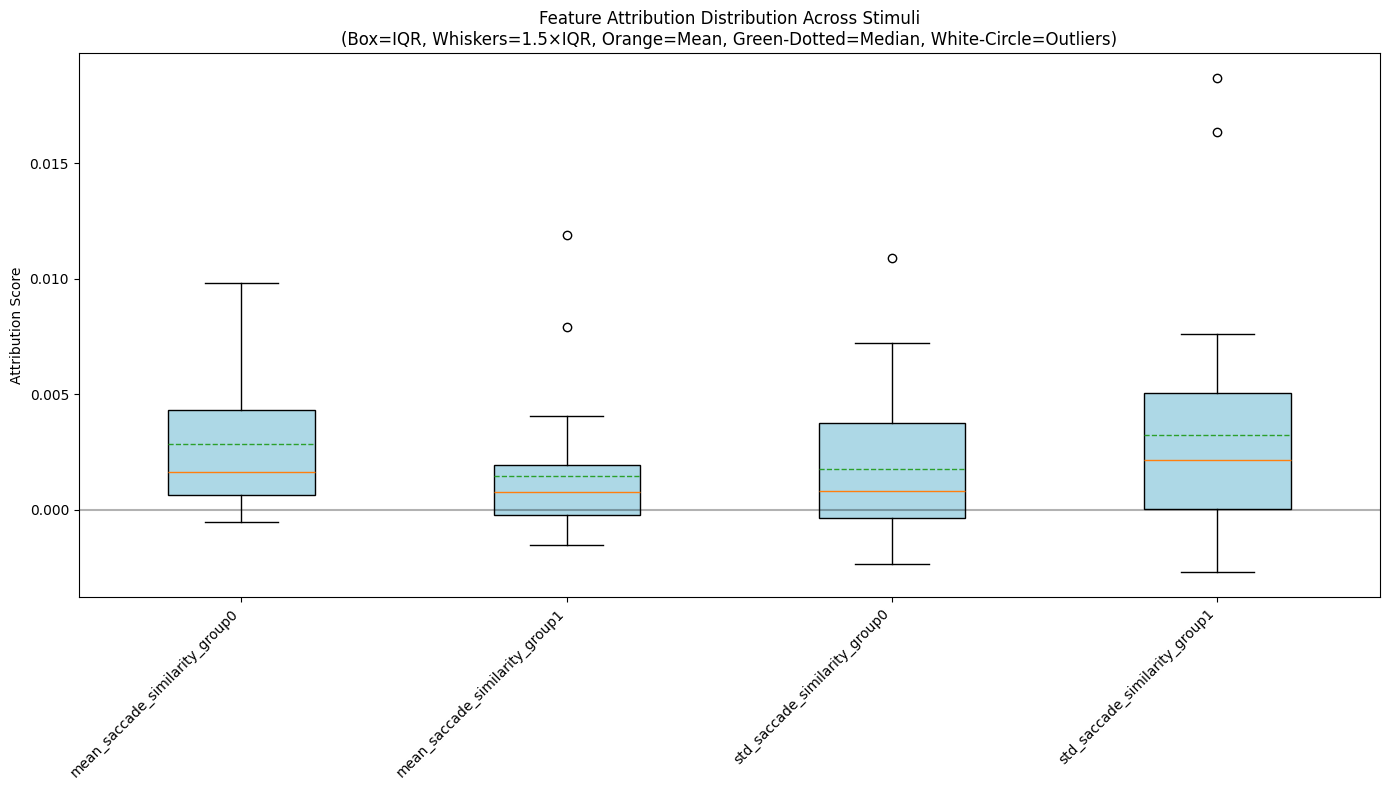


Feature Attribution Summary:
------------------------------------------------------------
mean_saccade_similarity_group0: Mean= 0.0029, Std= 0.0029, Min=-0.0005, Max= 0.0098
mean_saccade_similarity_group1: Mean= 0.0015, Std= 0.0026, Min=-0.0015, Max= 0.0119
std_saccade_similarity_group0 : Mean= 0.0018, Std= 0.0030, Min=-0.0024, Max= 0.0109
std_saccade_similarity_group1 : Mean= 0.0032, Std= 0.0047, Min=-0.0027, Max= 0.0187


In [37]:
feature_names = [
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original

In [38]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [39]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.6837957501411438
Epoch 5 loss: 0.4342414438724518
Epoch 10 loss: 0.3554990589618683
Epoch 15 loss: 0.3323822617530823
Epoch 0 loss: 0.6432804465293884
Epoch 5 loss: 0.4239543676376343
Epoch 10 loss: 0.33793219923973083
Epoch 15 loss: 0.3281383514404297
Epoch 0 loss: 0.7083583474159241
Epoch 5 loss: 0.37719300389289856
Epoch 10 loss: 0.3401031494140625
Epoch 15 loss: 0.32790669798851013
Epoch 0 loss: 0.8700814843177795
Epoch 5 loss: 0.4411798417568207
Epoch 10 loss: 0.33723992109298706
Epoch 15 loss: 0.3307161331176758
Epoch 0 loss: 0.7022339105606079
Epoch 5 loss: 0.3939410448074341
Epoch 10 loss: 0.3472989499568939
Epoch 15 loss: 0.3323071599006653
Epoch 0 loss: 0.705646276473999
Epoch 5 loss: 0.45018622279167175
Epoch 10 loss: 0.3625679910182953
Epoch 15 loss: 0.3447369635105133
Epoch 0 loss: 0.7501010298728943
Epoch 5 loss: 0.39368534088134766
Epoch 10 loss: 0.34340110421180725
Epoch 15 loss: 0.3297651708126068
Epoch 0 loss: 0.6826069951057434
Epoc

In [40]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6837957501411438
Epoch 5 loss: 0.46472233533859253
Epoch 10 loss: 0.3857937157154083
Epoch 15 loss: 0.3438124358654022
Epoch 0 loss: 0.6432804465293884
Epoch 5 loss: 0.4574418365955353
Epoch 10 loss: 0.3667601943016052
Epoch 15 loss: 0.34251129627227783
Epoch 0 loss: 0.7083583474159241
Epoch 5 loss: 0.4130924642086029
Epoch 10 loss: 0.3729897439479828
Epoch 15 loss: 0.33862853050231934
Epoch 0 loss: 0.8700814843177795
Epoch 5 loss: 0.4553815424442291
Epoch 10 loss: 0.3556569516658783
Epoch 15 loss: 0.3486737310886383
Epoch 0 loss: 0.7022339105606079
Epoch 5 loss: 0.4150554835796356
Epoch 10 loss: 0.376549631357193
Epoch 15 loss: 0.36333325505256653
Epoch 0 loss: 0.705646276473999
Epoch 5 loss: 0.4663189649581909
Epoch 10 loss: 0.38290008902549744
Epoch 15 loss: 0.35559016466140747
Epoch 0 loss: 0.7501010298728943
Epoch 5 loss: 0.4144715964794159
Epoch 10 loss: 0.3702908456325531
Epoch 15 loss: 0.3381136357784271
Epoch 0 loss: 0.6826069951057434
Epoch 

Approximation Error: -2.5060549887712114e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_58512\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


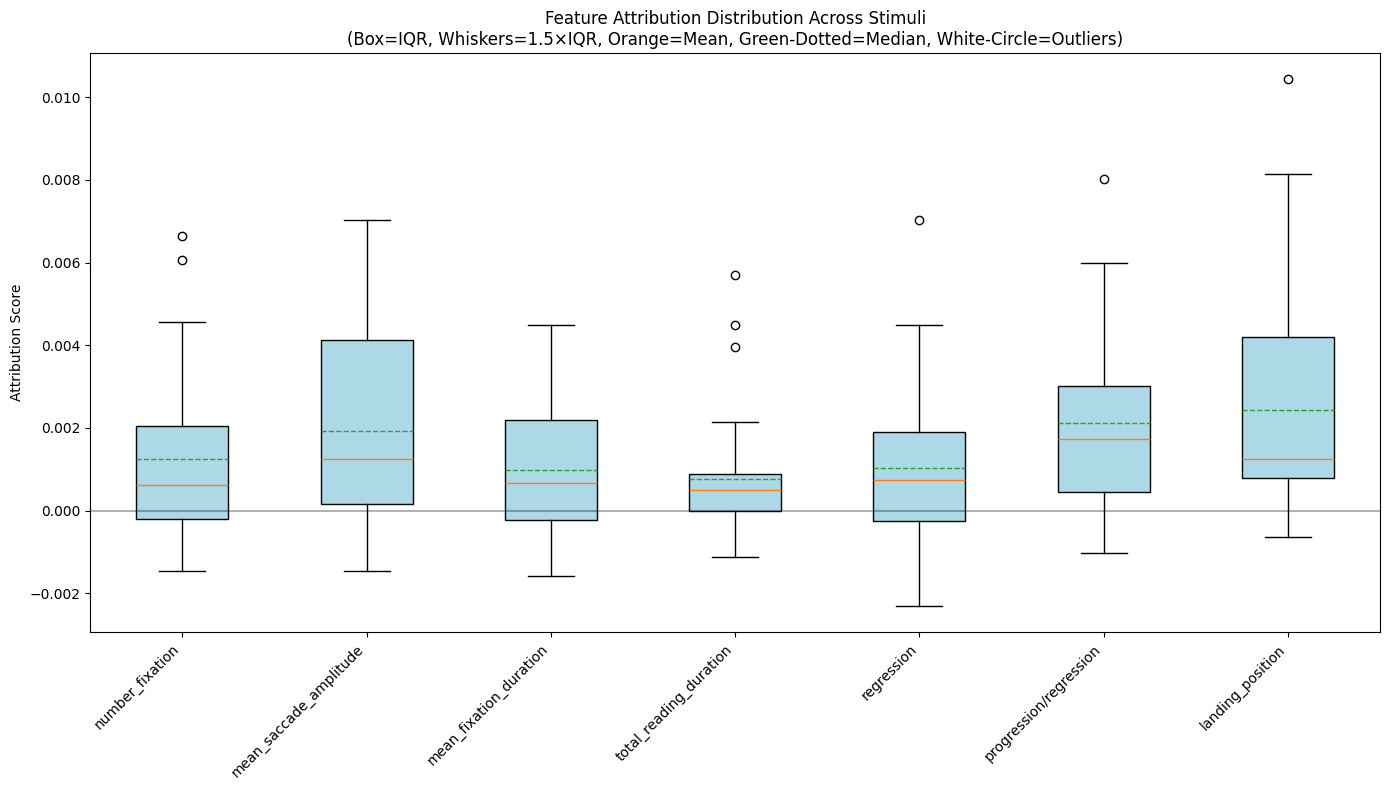


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0012, Std= 0.0020, Min=-0.0015, Max= 0.0066
mean_saccade_amplitude        : Mean= 0.0019, Std= 0.0023, Min=-0.0015, Max= 0.0070
mean_fixation_duration        : Mean= 0.0010, Std= 0.0015, Min=-0.0016, Max= 0.0045
total_reading_duration        : Mean= 0.0008, Std= 0.0015, Min=-0.0011, Max= 0.0057
regression                    : Mean= 0.0010, Std= 0.0020, Min=-0.0023, Max= 0.0070
progression/regression        : Mean= 0.0021, Std= 0.0021, Min=-0.0010, Max= 0.0080
landing_position              : Mean= 0.0024, Std= 0.0027, Min=-0.0006, Max= 0.0104


In [41]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original (without mean saccade amplitude)

In [42]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [43]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 90)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(90, 45)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(45, 23) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(23, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8219226598739624
Epoch 5 loss: 0.44933345913887024
Epoch 10 loss: 0.35260385274887085
Epoch 15 loss: 0.33449479937553406
Epoch 0 loss: 0.7428519129753113
Epoch 5 loss: 0.40158939361572266
Epoch 10 loss: 0.35767316818237305
Epoch 15 loss: 0.3428620994091034
Epoch 0 loss: 0.7268548607826233
Epoch 5 loss: 0.41453632712364197
Epoch 10 loss: 0.36314794421195984
Epoch 15 loss: 0.34228140115737915
Epoch 0 loss: 0.6906261444091797
Epoch 5 loss: 0.47126808762550354
Epoch 10 loss: 0.3535974621772766
Epoch 15 loss: 0.33113428950309753
Epoch 0 loss: 0.7475466728210449
Epoch 5 loss: 0.4650498628616333
Epoch 10 loss: 0.3636743128299713
Epoch 15 loss: 0.34723296761512756
Epoch 0 loss: 0.6647014617919922
Epoch 5 loss: 0.5603002905845642
Epoch 10 loss: 0.37716078758239746
Epoch 15 loss: 0.34364861249923706
Epoch 0 loss: 0.8792158961296082
Epoch 5 loss: 0.4666091501712799
Epoch 10 loss: 0.34929120540618896
Epoch 15 loss: 0.338163822889328
Epoch 0 loss: 0.75678020715713

In [44]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8219226598739624
Epoch 5 loss: 0.4808743894100189
Epoch 10 loss: 0.393964946269989
Epoch 15 loss: 0.3620200753211975
Epoch 0 loss: 0.7428519129753113
Epoch 5 loss: 0.4291827976703644
Epoch 10 loss: 0.38754916191101074
Epoch 15 loss: 0.3719480633735657
Epoch 0 loss: 0.7268548607826233
Epoch 5 loss: 0.43500974774360657
Epoch 10 loss: 0.36939552426338196
Epoch 15 loss: 0.35309600830078125
Epoch 0 loss: 0.6906261444091797
Epoch 5 loss: 0.4934525191783905
Epoch 10 loss: 0.39353352785110474
Epoch 15 loss: 0.36148157715797424
Epoch 0 loss: 0.7475466728210449
Epoch 5 loss: 0.4794600009918213
Epoch 10 loss: 0.3903612792491913
Epoch 15 loss: 0.3735169470310211
Epoch 0 loss: 0.6647014617919922
Epoch 5 loss: 0.5778343081474304
Epoch 10 loss: 0.42930588126182556
Epoch 15 loss: 0.37916284799575806
Epoch 0 loss: 0.8792158961296082
Epoch 5 loss: 0.48803970217704773
Epoch 10 loss: 0.372224897146225
Epoch 15 loss: 0.36004170775413513
Epoch 0 loss: 0.756780207157135
Epo

Approximation Error: 8.520518167642877e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_58512\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


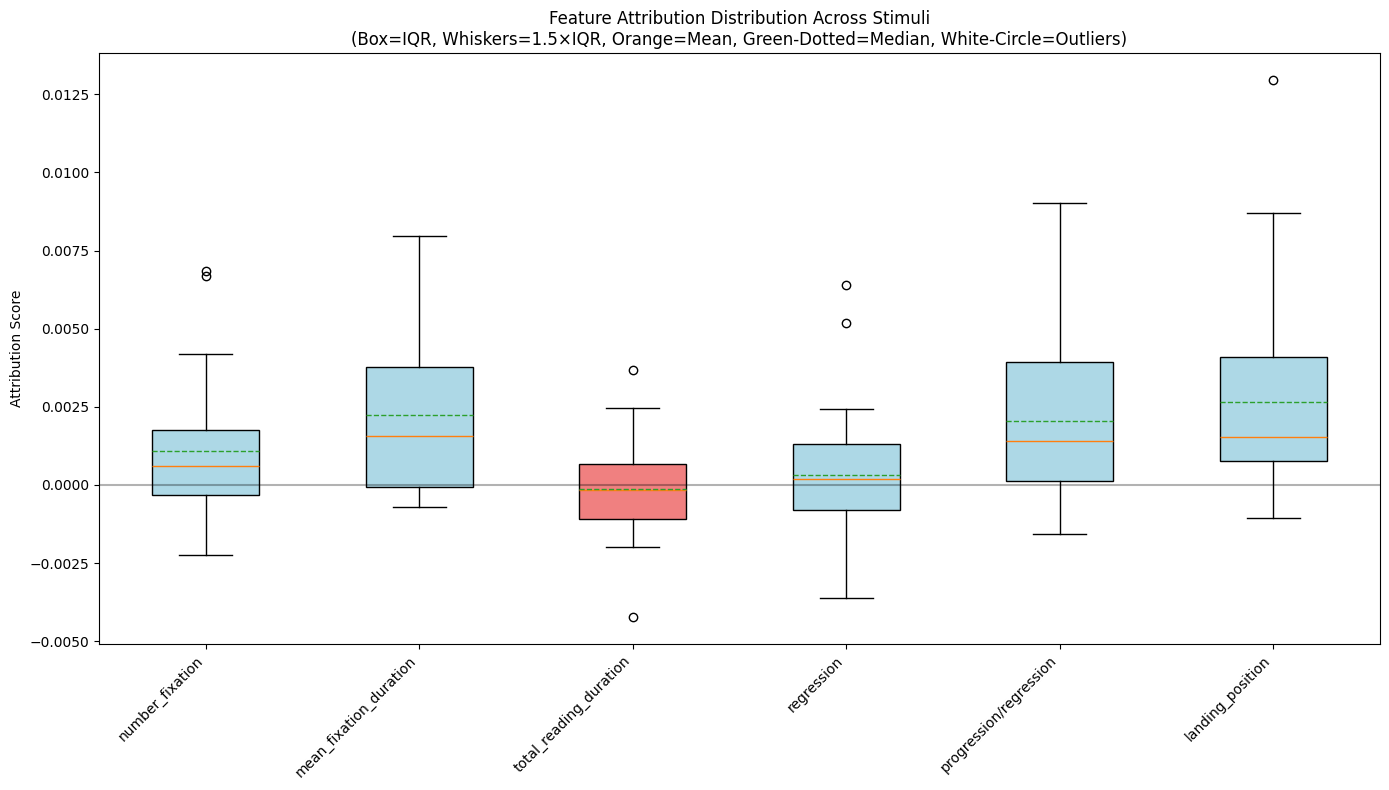


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0011, Std= 0.0021, Min=-0.0022, Max= 0.0069
mean_fixation_duration        : Mean= 0.0023, Std= 0.0025, Min=-0.0007, Max= 0.0080
total_reading_duration        : Mean=-0.0001, Std= 0.0015, Min=-0.0042, Max= 0.0037
regression                    : Mean= 0.0003, Std= 0.0021, Min=-0.0036, Max= 0.0064
progression/regression        : Mean= 0.0020, Std= 0.0026, Min=-0.0016, Max= 0.0090
landing_position              : Mean= 0.0027, Std= 0.0030, Min=-0.0010, Max= 0.0130


In [45]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original + Additional Features

In [46]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_saccade_amplitude']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [47]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.813932478427887
Epoch 5 loss: 0.3753384053707123
Epoch 10 loss: 0.3319183588027954
Epoch 15 loss: 0.3304937481880188
Epoch 0 loss: 0.8607214093208313
Epoch 5 loss: 0.4076169431209564
Epoch 10 loss: 0.3481937050819397
Epoch 15 loss: 0.3341495394706726
Epoch 0 loss: 0.7352632880210876
Epoch 5 loss: 0.40930384397506714
Epoch 10 loss: 0.33810967206954956
Epoch 15 loss: 0.32864511013031006
Epoch 0 loss: 0.6260717511177063
Epoch 5 loss: 0.3483879864215851
Epoch 10 loss: 0.34660518169403076
Epoch 15 loss: 0.32851120829582214
Epoch 0 loss: 0.763529360294342
Epoch 5 loss: 0.4149150252342224
Epoch 10 loss: 0.365260511636734
Epoch 15 loss: 0.33113595843315125
Epoch 0 loss: 0.6728397607803345
Epoch 5 loss: 0.3896036446094513
Epoch 10 loss: 0.3472959101200104
Epoch 15 loss: 0.3302687108516693
Epoch 0 loss: 0.7112258672714233
Epoch 5 loss: 0.4005180597305298
Epoch 10 loss: 0.3579843044281006
Epoch 15 loss: 0.329437255859375
Epoch 0 loss: 0.6632840633392334
Epoch 5 

In [48]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.813932478427887
Epoch 5 loss: 0.40017661452293396
Epoch 10 loss: 0.372514009475708
Epoch 15 loss: 0.34170880913734436
Epoch 0 loss: 0.8607214093208313
Epoch 5 loss: 0.42890048027038574
Epoch 10 loss: 0.36962616443634033
Epoch 15 loss: 0.34303760528564453
Epoch 0 loss: 0.7352632880210876
Epoch 5 loss: 0.4405966103076935
Epoch 10 loss: 0.34972041845321655
Epoch 15 loss: 0.3417891561985016
Epoch 0 loss: 0.6260717511177063
Epoch 5 loss: 0.37041693925857544
Epoch 10 loss: 0.38010847568511963
Epoch 15 loss: 0.34860557317733765
Epoch 0 loss: 0.763529360294342
Epoch 5 loss: 0.42971858382225037
Epoch 10 loss: 0.36947035789489746
Epoch 15 loss: 0.3445267379283905
Epoch 0 loss: 0.6728397607803345
Epoch 5 loss: 0.42163822054862976
Epoch 10 loss: 0.36275047063827515
Epoch 15 loss: 0.35686492919921875
Epoch 0 loss: 0.7112258672714233
Epoch 5 loss: 0.443344384431839
Epoch 10 loss: 0.380111426115036
Epoch 15 loss: 0.350626140832901
Epoch 0 loss: 0.6632840633392334
Ep

Approximation Error: 9.960954048437998e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_58512\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


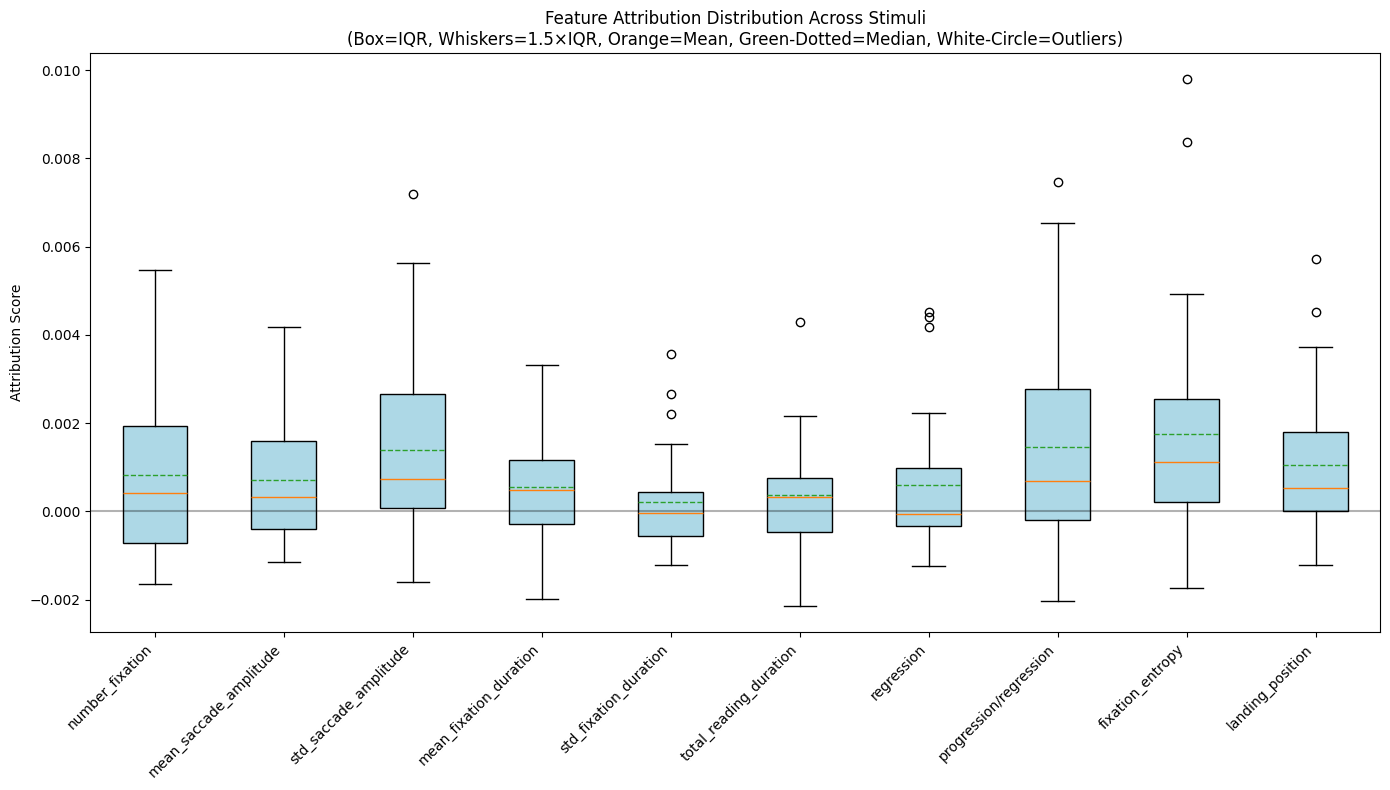


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0008, Std= 0.0019, Min=-0.0016, Max= 0.0055
mean_saccade_amplitude        : Mean= 0.0007, Std= 0.0014, Min=-0.0012, Max= 0.0042
std_saccade_amplitude         : Mean= 0.0014, Std= 0.0021, Min=-0.0016, Max= 0.0072
mean_fixation_duration        : Mean= 0.0006, Std= 0.0012, Min=-0.0020, Max= 0.0033
std_fixation_duration         : Mean= 0.0002, Std= 0.0011, Min=-0.0012, Max= 0.0036
total_reading_duration        : Mean= 0.0004, Std= 0.0012, Min=-0.0021, Max= 0.0043
regression                    : Mean= 0.0006, Std= 0.0015, Min=-0.0012, Max= 0.0045
progression/regression        : Mean= 0.0014, Std= 0.0023, Min=-0.0020, Max= 0.0075
fixation_entropy              : Mean= 0.0017, Std= 0.0026, Min=-0.0017, Max= 0.0098
landing_position              : Mean= 0.0010, Std= 0.0016, Min=-0.0012, Max= 0.0057


In [49]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Similarity features (Avg and Std)

In [50]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [51]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [52]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7675744891166687
Epoch 5 loss: 0.36506035923957825
Epoch 10 loss: 0.3297054171562195
Epoch 15 loss: 0.32757920026779175
Epoch 0 loss: 0.6759836077690125
Epoch 5 loss: 0.3649630546569824
Epoch 10 loss: 0.3303968012332916
Epoch 15 loss: 0.3285161554813385
Epoch 0 loss: 0.7169239521026611
Epoch 5 loss: 0.35545891523361206
Epoch 10 loss: 0.3340940475463867
Epoch 15 loss: 0.3294711112976074
Epoch 0 loss: 0.6768929958343506
Epoch 5 loss: 0.400316059589386
Epoch 10 loss: 0.3440675735473633
Epoch 15 loss: 0.32888686656951904
Epoch 0 loss: 0.7036916017532349
Epoch 5 loss: 0.38221633434295654
Epoch 10 loss: 0.3298158347606659
Epoch 15 loss: 0.32865116000175476
Epoch 0 loss: 0.7605988383293152
Epoch 5 loss: 0.36493080854415894
Epoch 10 loss: 0.33330804109573364
Epoch 15 loss: 0.3303980231285095
Epoch 0 loss: 0.6972098350524902
Epoch 5 loss: 0.3737953007221222
Epoch 10 loss: 0.32925543189048767
Epoch 15 loss: 0.32801806926727295
Epoch 0 loss: 0.6456154584884644
E

In [53]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7675744891166687
Epoch 5 loss: 0.36977171897888184
Epoch 10 loss: 0.33689814805984497
Epoch 15 loss: 0.33561551570892334
Epoch 0 loss: 0.6759836077690125
Epoch 5 loss: 0.3903190493583679
Epoch 10 loss: 0.3457558751106262
Epoch 15 loss: 0.3382408618927002
Epoch 0 loss: 0.7169239521026611
Epoch 5 loss: 0.37321048974990845
Epoch 10 loss: 0.35589176416397095
Epoch 15 loss: 0.34257325530052185
Epoch 0 loss: 0.6768929958343506
Epoch 5 loss: 0.4311903417110443
Epoch 10 loss: 0.3686397075653076
Epoch 15 loss: 0.34849676489830017
Epoch 0 loss: 0.7036916017532349
Epoch 5 loss: 0.40659061074256897
Epoch 10 loss: 0.34661999344825745
Epoch 15 loss: 0.3370223343372345
Epoch 0 loss: 0.7605988383293152
Epoch 5 loss: 0.39276552200317383
Epoch 10 loss: 0.3511698544025421
Epoch 15 loss: 0.34352660179138184
Epoch 0 loss: 0.6972098350524902
Epoch 5 loss: 0.39707526564598083
Epoch 10 loss: 0.34285494685173035
Epoch 15 loss: 0.3354283273220062
Epoch 0 loss: 0.64561545848846

Approximation Error: -0.00019008066738024354 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_58512\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


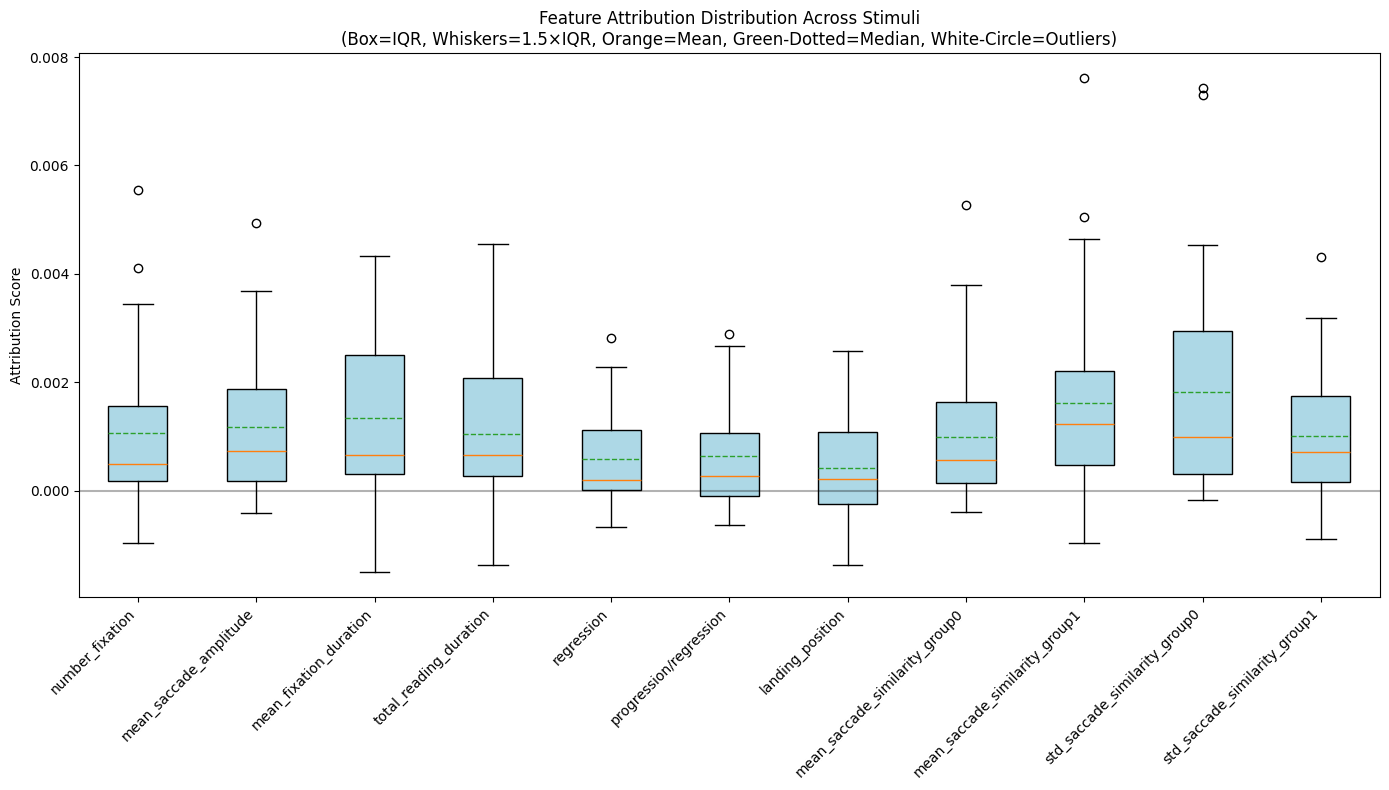


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0011, Std= 0.0015, Min=-0.0010, Max= 0.0055
mean_saccade_amplitude        : Mean= 0.0012, Std= 0.0013, Min=-0.0004, Max= 0.0049
mean_fixation_duration        : Mean= 0.0013, Std= 0.0015, Min=-0.0015, Max= 0.0043
total_reading_duration        : Mean= 0.0010, Std= 0.0013, Min=-0.0014, Max= 0.0045
regression                    : Mean= 0.0006, Std= 0.0009, Min=-0.0007, Max= 0.0028
progression/regression        : Mean= 0.0006, Std= 0.0010, Min=-0.0006, Max= 0.0029
landing_position              : Mean= 0.0004, Std= 0.0009, Min=-0.0014, Max= 0.0026
mean_saccade_similarity_group0: Mean= 0.0010, Std= 0.0013, Min=-0.0004, Max= 0.0053
mean_saccade_similarity_group1: Mean= 0.0016, Std= 0.0018, Min=-0.0010, Max= 0.0076
std_saccade_similarity_group0 : Mean= 0.0018, Std= 0.0020, Min=-0.0002, Max= 0.0074
std_saccade_similarity_group1 : Mean= 0.0010, Std= 0.0012, Min=-0.000

In [54]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Mean Similarity features

In [55]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [56]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 130)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(130, 65)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(65, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7555542588233948
Epoch 5 loss: 0.4608888328075409
Epoch 10 loss: 0.34813711047172546
Epoch 15 loss: 0.3294135630130768
Epoch 0 loss: 0.6735147833824158
Epoch 5 loss: 0.40167269110679626
Epoch 10 loss: 0.3386746942996979
Epoch 15 loss: 0.32849401235580444
Epoch 0 loss: 0.6546448469161987
Epoch 5 loss: 0.38117700815200806
Epoch 10 loss: 0.3446162939071655
Epoch 15 loss: 0.33213409781455994
Epoch 0 loss: 0.8128162622451782
Epoch 5 loss: 0.47086259722709656
Epoch 10 loss: 0.344900906085968
Epoch 15 loss: 0.33094584941864014
Epoch 0 loss: 0.8583282828330994
Epoch 5 loss: 0.40040549635887146
Epoch 10 loss: 0.3365049660205841
Epoch 15 loss: 0.320423424243927
Epoch 0 loss: 0.7049848437309265
Epoch 5 loss: 0.40077999234199524
Epoch 10 loss: 0.34147390723228455
Epoch 15 loss: 0.33388128876686096
Epoch 0 loss: 0.7421717047691345
Epoch 5 loss: 0.40079325437545776
Epoch 10 loss: 0.33733421564102173
Epoch 15 loss: 0.333467960357666
Epoch 0 loss: 0.6617705821990967


In [57]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7555542588233948
Epoch 5 loss: 0.47427600622177124
Epoch 10 loss: 0.3837316334247589
Epoch 15 loss: 0.3460123836994171
Epoch 0 loss: 0.6735147833824158
Epoch 5 loss: 0.4262082874774933
Epoch 10 loss: 0.364317387342453
Epoch 15 loss: 0.34083932638168335
Epoch 0 loss: 0.6546448469161987
Epoch 5 loss: 0.42050376534461975
Epoch 10 loss: 0.368551105260849
Epoch 15 loss: 0.3459858298301697
Epoch 0 loss: 0.8128162622451782
Epoch 5 loss: 0.4926186800003052
Epoch 10 loss: 0.367329865694046
Epoch 15 loss: 0.34323394298553467
Epoch 0 loss: 0.8583282828330994
Epoch 5 loss: 0.4212406277656555
Epoch 10 loss: 0.35830792784690857
Epoch 15 loss: 0.3275080621242523
Epoch 0 loss: 0.7049848437309265
Epoch 5 loss: 0.436369925737381
Epoch 10 loss: 0.37293678522109985
Epoch 15 loss: 0.3500274121761322
Epoch 0 loss: 0.7421717047691345
Epoch 5 loss: 0.42590755224227905
Epoch 10 loss: 0.3645201623439789
Epoch 15 loss: 0.35426777601242065
Epoch 0 loss: 0.6617705821990967
Epoch 

Approximation Error: 7.634196663275361e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_58512\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


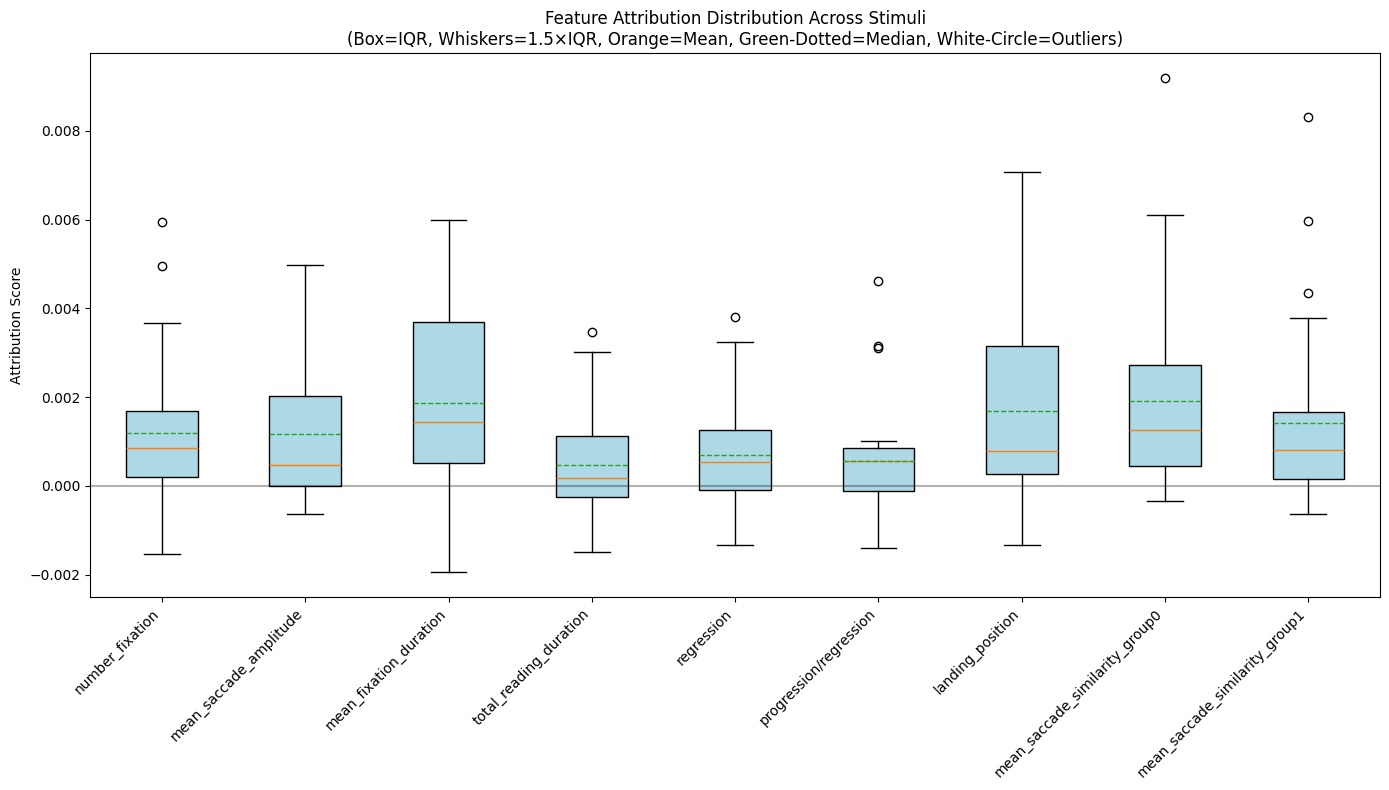


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0012, Std= 0.0016, Min=-0.0015, Max= 0.0059
mean_saccade_amplitude        : Mean= 0.0012, Std= 0.0017, Min=-0.0006, Max= 0.0050
mean_fixation_duration        : Mean= 0.0019, Std= 0.0019, Min=-0.0019, Max= 0.0060
total_reading_duration        : Mean= 0.0005, Std= 0.0011, Min=-0.0015, Max= 0.0035
regression                    : Mean= 0.0007, Std= 0.0012, Min=-0.0013, Max= 0.0038
progression/regression        : Mean= 0.0006, Std= 0.0012, Min=-0.0014, Max= 0.0046
landing_position              : Mean= 0.0017, Std= 0.0021, Min=-0.0013, Max= 0.0071
mean_saccade_similarity_group0: Mean= 0.0019, Std= 0.0021, Min=-0.0003, Max= 0.0092
mean_saccade_similarity_group1: Mean= 0.0014, Std= 0.0020, Min=-0.0006, Max= 0.0083


In [58]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Mean Similarity features (without mean saccade amplitude)

In [59]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [60]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7306987047195435
Epoch 5 loss: 0.4285065829753876
Epoch 10 loss: 0.33947449922561646
Epoch 15 loss: 0.3373042643070221
Epoch 0 loss: 0.7547160387039185
Epoch 5 loss: 0.39628905057907104
Epoch 10 loss: 0.3444103002548218
Epoch 15 loss: 0.3158067464828491
Epoch 0 loss: 0.6637886166572571
Epoch 5 loss: 0.4256105124950409
Epoch 10 loss: 0.351663202047348
Epoch 15 loss: 0.3319266736507416
Epoch 0 loss: 0.7154499888420105
Epoch 5 loss: 0.3737032115459442
Epoch 10 loss: 0.34006184339523315
Epoch 15 loss: 0.32944735884666443
Epoch 0 loss: 0.6896449327468872
Epoch 5 loss: 0.3979533612728119
Epoch 10 loss: 0.34314975142478943
Epoch 15 loss: 0.33214065432548523
Epoch 0 loss: 0.7151475548744202
Epoch 5 loss: 0.3854769766330719
Epoch 10 loss: 0.34018954634666443
Epoch 15 loss: 0.3282771706581116
Epoch 0 loss: 0.8605122566223145
Epoch 5 loss: 0.3979755640029907
Epoch 10 loss: 0.33229580521583557
Epoch 15 loss: 0.3301256000995636
Epoch 0 loss: 0.8119704723358154
Epo

In [61]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7306987047195435
Epoch 5 loss: 0.4576384723186493
Epoch 10 loss: 0.3769654631614685
Epoch 15 loss: 0.3611100912094116
Epoch 0 loss: 0.7547160387039185
Epoch 5 loss: 0.41676852107048035
Epoch 10 loss: 0.36546841263771057
Epoch 15 loss: 0.33669742941856384
Epoch 0 loss: 0.6637886166572571
Epoch 5 loss: 0.4525350034236908
Epoch 10 loss: 0.38565659523010254
Epoch 15 loss: 0.34658485651016235
Epoch 0 loss: 0.7154499888420105
Epoch 5 loss: 0.40320885181427
Epoch 10 loss: 0.35113525390625
Epoch 15 loss: 0.3485778868198395
Epoch 0 loss: 0.6896449327468872
Epoch 5 loss: 0.42846348881721497
Epoch 10 loss: 0.35217297077178955
Epoch 15 loss: 0.3526745140552521
Epoch 0 loss: 0.7151475548744202
Epoch 5 loss: 0.4169195592403412
Epoch 10 loss: 0.3723600208759308
Epoch 15 loss: 0.3404879570007324
Epoch 0 loss: 0.8605122566223145
Epoch 5 loss: 0.4230372905731201
Epoch 10 loss: 0.35570016503334045
Epoch 15 loss: 0.3451794385910034
Epoch 0 loss: 0.8119704723358154
Epoch 

Approximation Error: -0.0003287667641416192 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_58512\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


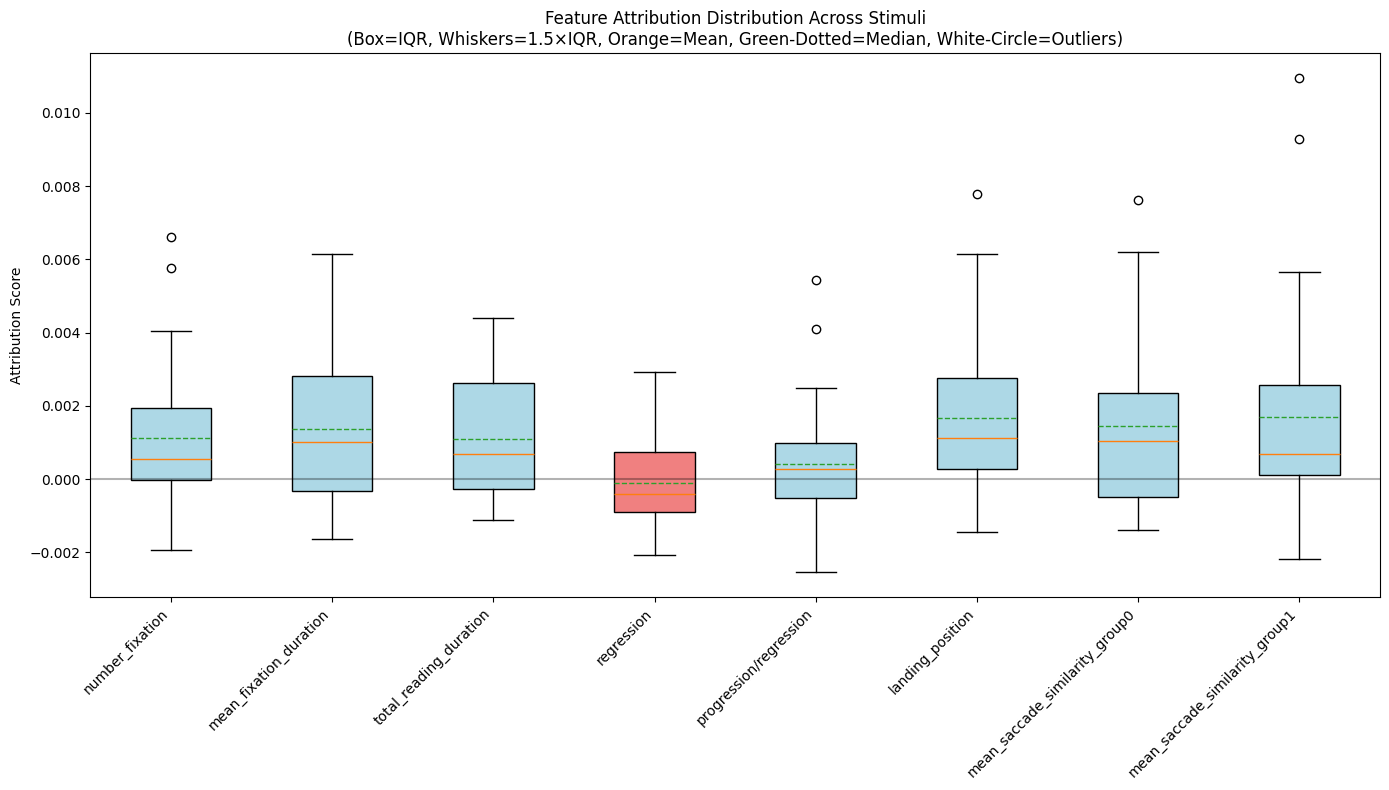


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0011, Std= 0.0020, Min=-0.0019, Max= 0.0066
mean_fixation_duration        : Mean= 0.0014, Std= 0.0021, Min=-0.0016, Max= 0.0062
total_reading_duration        : Mean= 0.0011, Std= 0.0016, Min=-0.0011, Max= 0.0044
regression                    : Mean=-0.0001, Std= 0.0012, Min=-0.0021, Max= 0.0029
progression/regression        : Mean= 0.0004, Std= 0.0016, Min=-0.0025, Max= 0.0054
landing_position              : Mean= 0.0017, Std= 0.0021, Min=-0.0014, Max= 0.0078
mean_saccade_similarity_group0: Mean= 0.0014, Std= 0.0023, Min=-0.0014, Max= 0.0076
mean_saccade_similarity_group1: Mean= 0.0017, Std= 0.0029, Min=-0.0022, Max= 0.0110


In [62]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [63]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [64]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7728636264801025
Epoch 5 loss: 0.41139453649520874
Epoch 10 loss: 0.354205459356308
Epoch 15 loss: 0.3283921480178833
Epoch 0 loss: 0.8054323792457581
Epoch 5 loss: 0.3869100511074066
Epoch 10 loss: 0.32902058959007263
Epoch 15 loss: 0.33106809854507446
Epoch 0 loss: 0.6928936839103699
Epoch 5 loss: 0.39681464433670044
Epoch 10 loss: 0.3330245316028595
Epoch 15 loss: 0.32771384716033936
Epoch 0 loss: 0.6963387131690979
Epoch 5 loss: 0.38499799370765686
Epoch 10 loss: 0.34827736020088196
Epoch 15 loss: 0.32892906665802
Epoch 0 loss: 0.6101365089416504
Epoch 5 loss: 0.3574312627315521
Epoch 10 loss: 0.33042246103286743
Epoch 15 loss: 0.33219340443611145
Epoch 0 loss: 0.7683335542678833
Epoch 5 loss: 0.4255068004131317
Epoch 10 loss: 0.33319929242134094
Epoch 15 loss: 0.3332147002220154
Epoch 0 loss: 0.6864997148513794
Epoch 5 loss: 0.4295274317264557
Epoch 10 loss: 0.334291011095047
Epoch 15 loss: 0.32264742255210876
Epoch 0 loss: 0.7049803137779236
Epo

In [65]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7728636264801025
Epoch 5 loss: 0.44313427805900574
Epoch 10 loss: 0.38853034377098083
Epoch 15 loss: 0.3510863482952118
Epoch 0 loss: 0.8054323792457581
Epoch 5 loss: 0.41285115480422974
Epoch 10 loss: 0.34292691946029663
Epoch 15 loss: 0.3479044735431671
Epoch 0 loss: 0.6928936839103699
Epoch 5 loss: 0.4275510311126709
Epoch 10 loss: 0.36798015236854553
Epoch 15 loss: 0.3251362144947052
Epoch 0 loss: 0.6963387131690979
Epoch 5 loss: 0.4128432869911194
Epoch 10 loss: 0.3623436689376831
Epoch 15 loss: 0.34332361817359924
Epoch 0 loss: 0.6101365089416504
Epoch 5 loss: 0.38123300671577454
Epoch 10 loss: 0.342850923538208
Epoch 15 loss: 0.3416226804256439
Epoch 0 loss: 0.7683335542678833
Epoch 5 loss: 0.4377002418041229
Epoch 10 loss: 0.34854763746261597
Epoch 15 loss: 0.34662342071533203
Epoch 0 loss: 0.6864997148513794
Epoch 5 loss: 0.44844910502433777
Epoch 10 loss: 0.35883456468582153
Epoch 15 loss: 0.3277357518672943
Epoch 0 loss: 0.7049803137779236


Approximation Error: 0.00012568882084451616 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_58512\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


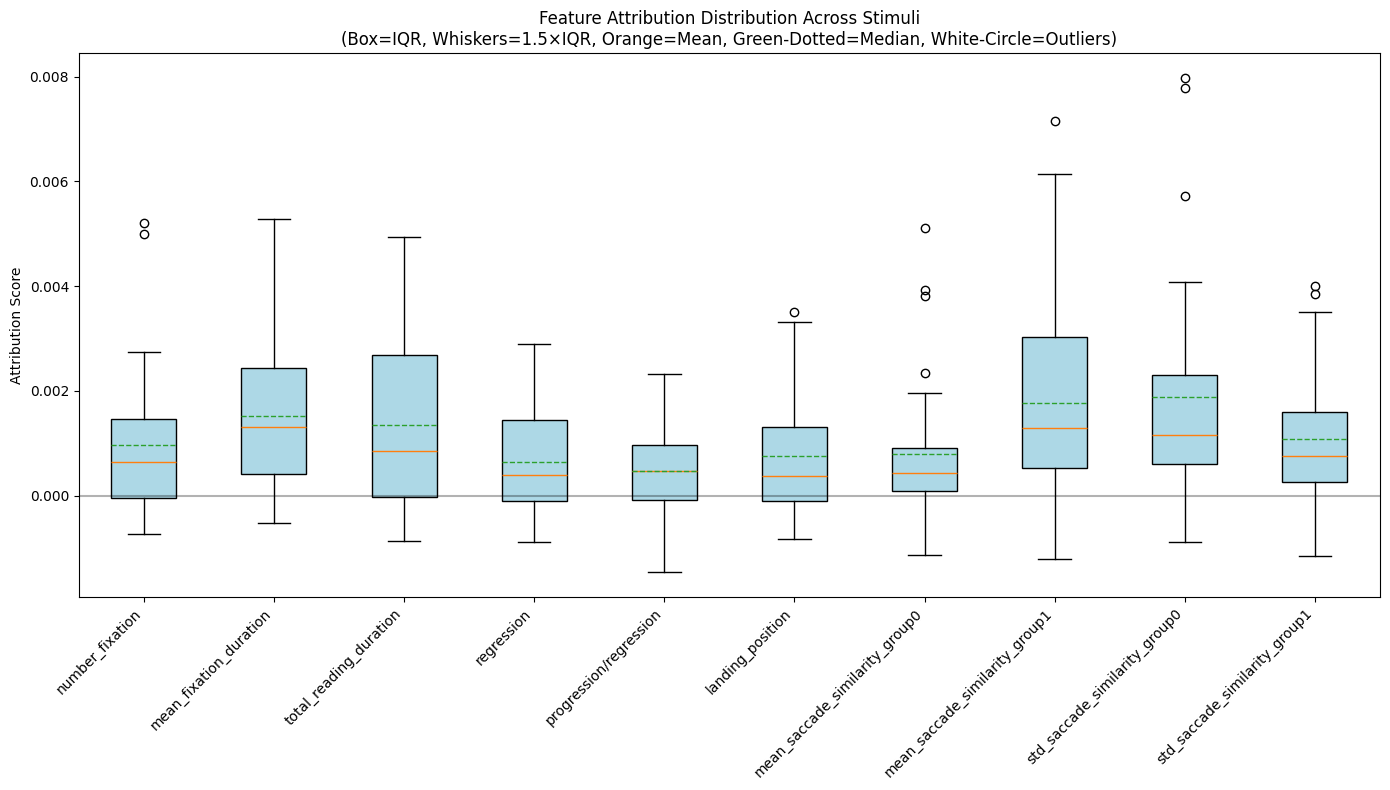


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0010, Std= 0.0014, Min=-0.0007, Max= 0.0052
mean_fixation_duration        : Mean= 0.0015, Std= 0.0014, Min=-0.0005, Max= 0.0053
total_reading_duration        : Mean= 0.0013, Std= 0.0017, Min=-0.0009, Max= 0.0049
regression                    : Mean= 0.0006, Std= 0.0010, Min=-0.0009, Max= 0.0029
progression/regression        : Mean= 0.0005, Std= 0.0009, Min=-0.0015, Max= 0.0023
landing_position              : Mean= 0.0007, Std= 0.0012, Min=-0.0008, Max= 0.0035
mean_saccade_similarity_group0: Mean= 0.0008, Std= 0.0014, Min=-0.0011, Max= 0.0051
mean_saccade_similarity_group1: Mean= 0.0018, Std= 0.0019, Min=-0.0012, Max= 0.0071
std_saccade_similarity_group0 : Mean= 0.0019, Std= 0.0021, Min=-0.0009, Max= 0.0080
std_saccade_similarity_group1 : Mean= 0.0011, Std= 0.0014, Min=-0.0012, Max= 0.0040


In [66]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### All features

In [67]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [68]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.6779685020446777
Epoch 5 loss: 0.3590944707393646
Epoch 10 loss: 0.329527348279953
Epoch 15 loss: 0.3282007575035095
Epoch 0 loss: 0.6581974029541016
Epoch 5 loss: 0.3524625897407532
Epoch 10 loss: 0.329155296087265
Epoch 15 loss: 0.32857197523117065
Epoch 0 loss: 0.7050528526306152
Epoch 5 loss: 0.38212090730667114
Epoch 10 loss: 0.3318464159965515
Epoch 15 loss: 0.3279431164264679
Epoch 0 loss: 0.672098696231842
Epoch 5 loss: 0.39098110795021057
Epoch 10 loss: 0.33111771941185
Epoch 15 loss: 0.3269728422164917
Epoch 0 loss: 0.7939891815185547
Epoch 5 loss: 0.37125101685523987
Epoch 10 loss: 0.3292229175567627
Epoch 15 loss: 0.32799604535102844
Epoch 0 loss: 0.7486633062362671
Epoch 5 loss: 0.36153444647789
Epoch 10 loss: 0.33241507411003113
Epoch 15 loss: 0.3292221426963806
Epoch 0 loss: 0.6668754816055298
Epoch 5 loss: 0.36286497116088867
Epoch 10 loss: 0.3317001760005951
Epoch 15 loss: 0.3274879455566406
Epoch 0 loss: 0.8096023201942444
Epoch 5 lo

In [69]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6779685020446777
Epoch 5 loss: 0.3828050196170807
Epoch 10 loss: 0.351655513048172
Epoch 15 loss: 0.34179067611694336
Epoch 0 loss: 0.6581974029541016
Epoch 5 loss: 0.3734554648399353
Epoch 10 loss: 0.33988726139068604
Epoch 15 loss: 0.33733201026916504
Epoch 0 loss: 0.7050528526306152
Epoch 5 loss: 0.4131123721599579
Epoch 10 loss: 0.3459324240684509
Epoch 15 loss: 0.3296843469142914
Epoch 0 loss: 0.672098696231842
Epoch 5 loss: 0.4212217926979065
Epoch 10 loss: 0.35036221146583557
Epoch 15 loss: 0.3246568739414215
Epoch 0 loss: 0.7939891815185547
Epoch 5 loss: 0.40290045738220215
Epoch 10 loss: 0.3403354287147522
Epoch 15 loss: 0.3333762288093567
Epoch 0 loss: 0.7486633062362671
Epoch 5 loss: 0.3814118504524231
Epoch 10 loss: 0.3483945429325104
Epoch 15 loss: 0.333471417427063
Epoch 0 loss: 0.6668754816055298
Epoch 5 loss: 0.3887486159801483
Epoch 10 loss: 0.34127166867256165
Epoch 15 loss: 0.329148530960083
Epoch 0 loss: 0.8096023201942444
Epoch 5 

Approximation Error: 0.00014982618449721485 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_58512\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


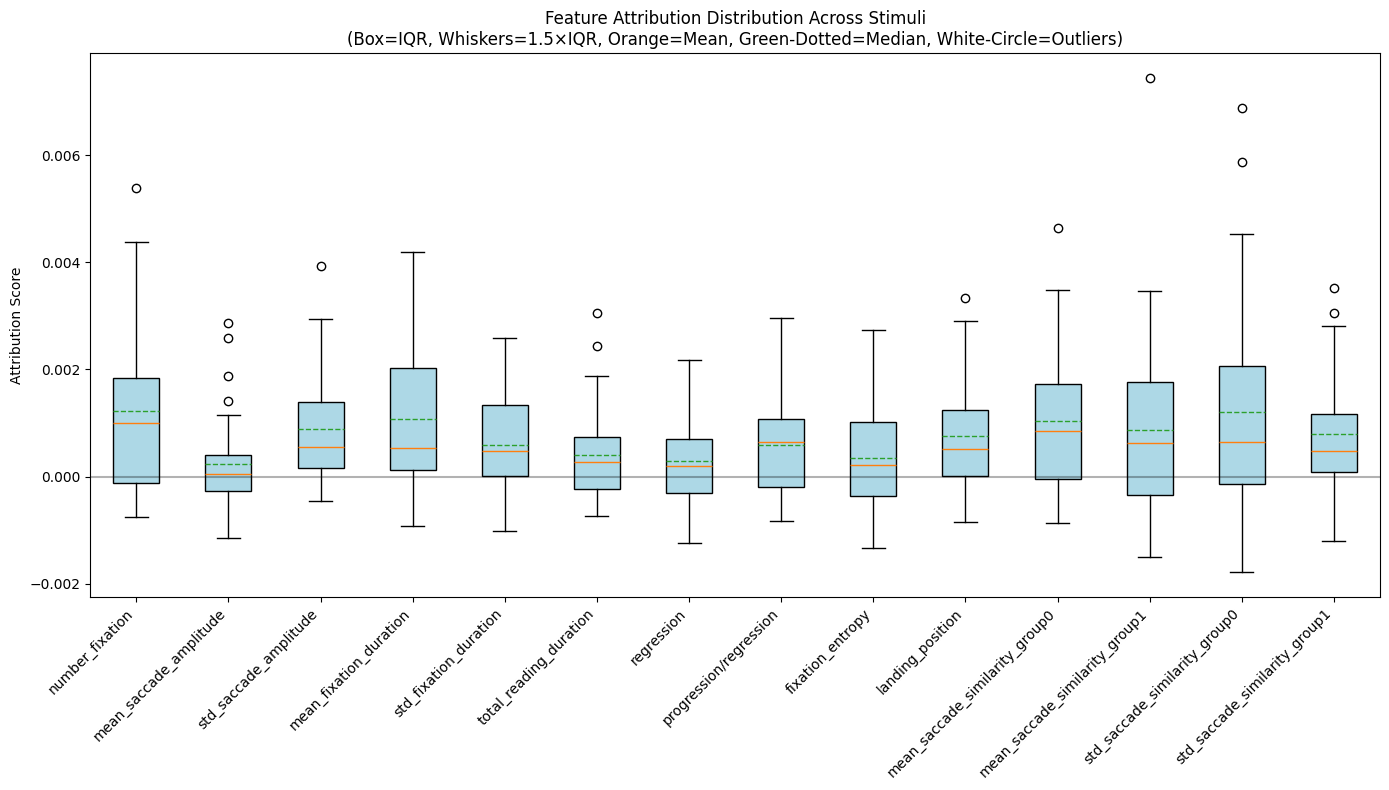


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0012, Std= 0.0015, Min=-0.0008, Max= 0.0054
mean_saccade_amplitude        : Mean= 0.0002, Std= 0.0009, Min=-0.0011, Max= 0.0029
std_saccade_amplitude         : Mean= 0.0009, Std= 0.0010, Min=-0.0005, Max= 0.0039
mean_fixation_duration        : Mean= 0.0011, Std= 0.0014, Min=-0.0009, Max= 0.0042
std_fixation_duration         : Mean= 0.0006, Std= 0.0009, Min=-0.0010, Max= 0.0026
total_reading_duration        : Mean= 0.0004, Std= 0.0009, Min=-0.0007, Max= 0.0031
regression                    : Mean= 0.0003, Std= 0.0009, Min=-0.0012, Max= 0.0022
progression/regression        : Mean= 0.0006, Std= 0.0010, Min=-0.0008, Max= 0.0030
fixation_entropy              : Mean= 0.0004, Std= 0.0010, Min=-0.0013, Max= 0.0027
landing_position              : Mean= 0.0008, Std= 0.0010, Min=-0.0009, Max= 0.0033
mean_saccade_similarity_group0: Mean= 0.0010, Std= 0.0014, Min=-0.000

In [70]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

---

In [71]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [72]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli,0.5)

Using device: cuda
Epoch 0 loss: 0.7447317242622375
Epoch 5 loss: 0.4405829608440399
Epoch 10 loss: 0.34911277890205383
Epoch 15 loss: 0.3326113522052765
Epoch 0 loss: 0.8291330337524414
Epoch 5 loss: 0.4244476556777954
Epoch 10 loss: 0.33701351284980774
Epoch 15 loss: 0.3413822650909424
Epoch 0 loss: 0.6469208002090454
Epoch 5 loss: 0.42723485827445984
Epoch 10 loss: 0.3627501428127289
Epoch 15 loss: 0.3303561806678772
Epoch 0 loss: 0.7204973101615906
Epoch 5 loss: 0.38930559158325195
Epoch 10 loss: 0.3425111472606659
Epoch 15 loss: 0.33059820532798767
Epoch 0 loss: 0.6592747569084167
Epoch 5 loss: 0.422789067029953
Epoch 10 loss: 0.3399691581726074
Epoch 15 loss: 0.3179161846637726
Epoch 0 loss: 0.7553181052207947
Epoch 5 loss: 0.3663526475429535
Epoch 10 loss: 0.3389466106891632
Epoch 15 loss: 0.3293887972831726
Epoch 0 loss: 0.8210424780845642
Epoch 5 loss: 0.4097127318382263
Epoch 10 loss: 0.3584967255592346
Epoch 15 loss: 0.34156090021133423
Epoch 0 loss: 0.8260746002197266
Epoch